In [99]:
## imports 
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import LSTM
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.utils import to_categorical

In [100]:
from bs4 import BeautifulSoup
import requests
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [3]:
url = "https://ansible.uk/misc/15K-Striking.html"

# url = 'https://example.com/' # Replace with the URL of the webpage you want to scrape

response = requests.get(url)

soup = BeautifulSoup(response.text, 'html.parser')

list_items = soup.find_all('li')

all_sentences = []
for li in list_items:
    all_sentences.append(li.text.strip())
    print(li.text.strip())

A blind rage like a fire swept over him
A book that rends and tears like a broken saw
A breath of melancholy made itself felt like a chill and sudden gust from some unknown sea
A cloud in the west like a pall creeps upward
A cloud like a flag from the sky
A cluster of stars hangs like fruit in the tree
A confused mass of impressions, like an old rubbish-heap
A cry as of a sea-bird in the wind
A dead leaf might as reasonably demand to return to the tree
A drowsy murmur floats into the air like thistledown
A face as imperturbable as fate
A face as pale as wax
A face tempered like steel
A fatigued, faded, lusterless air, as of a caged creature
A few pens parched by long disuse
A figure like a carving on a spire
A fluttering as of blind bewildered moths
A giant galleon overhead, looked like some misty monster of the deep
A glacial pang of pain like the stab of a dagger of ice frozen from a poisoned well
A glance that flitted like a bird
A great moon like a red lamp in the sycamore
A grim f

In [4]:
# with open("simile.txt",'w', encoding='utf-8') as f:
#     for line in all_sentences:
#         f.write(line + '\n')

In [101]:
with open('simile.txt','r') as story:
  story_data = story.read()

print(story_data)

A blind rage like a fire swept over him
A book that rends and tears like a broken saw
A breath of melancholy made itself felt like a chill and sudden gust from some unknown sea
A cloud in the west like a pall creeps upward
A cloud like a flag from the sky
A cluster of stars hangs like fruit in the tree
A confused mass of impressions, like an old rubbish-heap
A cry as of a sea-bird in the wind
A dead leaf might as reasonably demand to return to the tree
A drowsy murmur floats into the air like thistledown
A face as imperturbable as fate
A face as pale as wax
A face tempered like steel
A fatigued, faded, lusterless air, as of a caged creature
A few pens parched by long disuse
A figure like a carving on a spire
A fluttering as of blind bewildered moths
A giant galleon overhead, looked like some misty monster of the deep
A glacial pang of pain like the stab of a dagger of ice frozen from a poisoned well
A glance that flitted like a bird
A great moon like a red lamp in the sycamore
A grim f

Cleaning Process 

In [102]:
import re                                

# Regular expressions to use sub function for replacing the useless text from the data

def clean_text(text):
  text = re.sub(r',', '', text)
  text = re.sub(r'\'', '',  text)
  text = re.sub(r'\"', '', text)
  text = re.sub(r'\(', '', text)
  text = re.sub(r'\)', '', text)
  text = re.sub(r'\n', '', text)
  text = re.sub(r'“', '', text)
  text = re.sub(r'”', '', text)
  text = re.sub(r'’', '', text)
  text = re.sub(r'\.', '', text)
  text = re.sub(r';', '', text)
  text = re.sub(r':', '', text)
  text = re.sub(r'\-', '', text)

  return text

In [103]:
lower_data = story_data.lower()
split_data = lower_data.splitlines()     
# Splitting the data to get every line seperately but this will give the list of uncleaned data

# print(split_data[0])                         

final = ''                               
# initiating a argument with blank string to hold the values of final cleaned data

for line in split_data:
  line = clean_text(line)
  final += '\n' + line

# print(final)
final_data = final.split('\n')       # splitting again to get list of cleaned and splitted data ready to be processed
print(final_data)

['', 'a blind rage like a fire swept over him', 'a book that rends and tears like a broken saw', 'a breath of melancholy made itself felt like a chill and sudden gust from some unknown sea', 'a cloud in the west like a pall creeps upward', 'a cloud like a flag from the sky', 'a cluster of stars hangs like fruit in the tree', 'a confused mass of impressions like an old rubbishheap', 'a cry as of a seabird in the wind', 'a dead leaf might as reasonably demand to return to the tree', 'a drowsy murmur floats into the air like thistledown', 'a face as imperturbable as fate', 'a face as pale as wax', 'a face tempered like steel', 'a fatigued faded lusterless air as of a caged creature', 'a few pens parched by long disuse', 'a figure like a carving on a spire', 'a fluttering as of blind bewildered moths', 'a giant galleon overhead looked like some misty monster of the deep', 'a glacial pang of pain like the stab of a dagger of ice frozen from a poisoned well', 'a glance that flitted like a bi

In [104]:
max_vocab = 1000000
tokenizer = Tokenizer(num_words=max_vocab)
tokenizer.fit_on_texts(final_data)

# Getting the total number of words of the data.
word2idx = tokenizer.word_index
print(len(word2idx))
print(word2idx)
vocab_size = len(word2idx) + 1        # Adding 1 to the vocab_size because the index starts from 1 not 0. This will make it uniform when using it further
print(vocab_size)

3088
{'like': 1, 'a': 2, 'the': 3, 'as': 4, 'of': 5, 'and': 6, 'in': 7, 'her': 8, 'that': 9, 'on': 10, 'an': 11, 'his': 12, 'to': 13, 'with': 14, 'was': 15, 'from': 16, 'is': 17, 'sea': 18, 'some': 19, 'she': 20, 'white': 21, 'it': 22, 'through': 23, 'he': 24, 'my': 25, 'eyes': 26, 'face': 27, 'their': 28, 'by': 29, 'upon': 30, 'sky': 31, 'at': 32, 'stars': 33, 'wind': 34, 'its': 35, 'are': 36, 'they': 37, 'which': 38, 'light': 39, 'rose': 40, 'into': 41, 'all': 42, 'dream': 43, 'cloud': 44, 'air': 45, 'out': 46, 'sun': 47, 'him': 48, 'soft': 49, 'sweet': 50, 'star': 51, 'one': 52, 'were': 53, 'great': 54, 'voice': 55, 'night': 56, 'when': 57, 'day': 58, 'snow': 59, 'your': 60, 'love': 61, 'life': 62, 'me': 63, 'had': 64, 'over': 65, 'little': 66, 'soul': 67, 'thought': 68, 'away': 69, 'deep': 70, 'heart': 71, 'child': 72, 'flower': 73, 'hair': 74, 'seemed': 75, 'whose': 76, 'have': 77, 'mountain': 78, 'i': 79, 'summer': 80, 'down': 81, 'pale': 82, 'before': 83, 'dark': 84, 'water': 85

In [105]:
input_seq = []

for line in final_data:
  token_list = tokenizer.texts_to_sequences([line])[0]
  for i in range(1, len(token_list)):
    n_gram_seq = token_list[:i+1]
    input_seq.append(n_gram_seq)

print(input_seq)

[[2, 204], [2, 204, 430], [2, 204, 430, 1], [2, 204, 430, 1, 2], [2, 204, 430, 1, 2, 100], [2, 204, 430, 1, 2, 100, 258], [2, 204, 430, 1, 2, 100, 258, 65], [2, 204, 430, 1, 2, 100, 258, 65, 48], [2, 620], [2, 620, 9], [2, 620, 9, 1087], [2, 620, 9, 1087, 6], [2, 620, 9, 1087, 6, 132], [2, 620, 9, 1087, 6, 132, 1], [2, 620, 9, 1087, 6, 132, 1, 2], [2, 620, 9, 1087, 6, 132, 1, 2, 205], [2, 620, 9, 1087, 6, 132, 1, 2, 205, 206], [2, 121], [2, 121, 5], [2, 121, 5, 621], [2, 121, 5, 621, 622], [2, 121, 5, 621, 622, 207], [2, 121, 5, 621, 622, 207, 324], [2, 121, 5, 621, 622, 207, 324, 1], [2, 121, 5, 621, 622, 207, 324, 1, 2], [2, 121, 5, 621, 622, 207, 324, 1, 2, 174], [2, 121, 5, 621, 622, 207, 324, 1, 2, 174, 6], [2, 121, 5, 621, 622, 207, 324, 1, 2, 174, 6, 106], [2, 121, 5, 621, 622, 207, 324, 1, 2, 174, 6, 106, 623], [2, 121, 5, 621, 622, 207, 324, 1, 2, 174, 6, 106, 623, 16], [2, 121, 5, 621, 622, 207, 324, 1, 2, 174, 6, 106, 623, 16, 19], [2, 121, 5, 621, 622, 207, 324, 1, 2, 174, 

In [106]:
# Getting the maximum length of sequence for padding purpose
max_seq_length = max(len(x) for x in input_seq)
print(max_seq_length)
# Padding the sequences and converting them to array
input_seq = np.array(pad_sequences(input_seq, maxlen=max_seq_length, padding='post'))
print(input_seq)

22
[[  2 204   0 ...   0   0   0]
 [  2 204 430 ...   0   0   0]
 [  2 204 430 ...   0   0   0]
 ...
 [416   1   2 ...   0   0   0]
 [416   1   2 ...   0   0   0]
 [416   1   2 ...   0   0   0]]


In [107]:
xs = input_seq[:, 1:]        # xs contains every word in sentence except the last one because we are using this value to predict the y value
labels = input_seq[:,0]     # labels contains only the last word of the sentence which will help in hot encoding the y value in next step
print("xs: ",xs)
print("labels:",labels)

xs:  [[204   0   0 ...   0   0   0]
 [204 430   0 ...   0   0   0]
 [204 430   1 ...   0   0   0]
 ...
 [  1   2   0 ...   0   0   0]
 [  1   2  80 ...   0   0   0]
 [  1   2  80 ...   0   0   0]]
labels: [  2   2   2 ... 416 416 416]


In [108]:
from tensorflow.keras.utils import to_categorical

# one-hot encoding the labels according to the vocab size

# The matrix is square matrix of the size of vocab_size. Each row will denote a label and it will have 
# a single +ve value(i.e 1) for that label and other values will be zero. 

ys = to_categorical(labels, num_classes=vocab_size)
ys

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [109]:
from tensorflow.keras.layers import Input, Dense, Embedding, LSTM, Dropout, Bidirectional, GlobalMaxPooling1D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential


In [110]:
# # using the functional APIs of keras to define the model
# i = Input(shape=(max_seq_length - 1, ))                           
# # using 1 less value becasuse we are preserving the last value for predicted word 
# x = Embedding(vocab_size, 124)(i)
# x = Dropout(0.2)(x)
# x = LSTM(520, return_sequences=True)(x)
# x = Bidirectional(layer=LSTM(340, return_sequences=True))(x)
# x = GlobalMaxPooling1D()(x)
# x = Dense(1024, activation='relu')(x)
# x = Dense(vocab_size, activation='softmax')(x)

# model = Model(i,x)

In [112]:
# using the functional APIs of keras to define the model
i = Input(shape=(max_seq_length - 1, ))                           
# using 1 less value becasuse we are preserving the last value for predicted word 
x = Embedding(vocab_size, 124)(i)
x = Dropout(0.2)(x)
x = LSTM(150, return_sequences=True)(x)
x = Bidirectional(layer=LSTM(100, return_sequences=True))(x)
x = GlobalMaxPooling1D()(x)
x = Dense(512, activation='relu')(x)
x = Dense(vocab_size, activation='softmax')(x)

model = Model(i,x)

In [113]:
model.compile(optimizer=Adam(lr=0.01),
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])
model.summary()    

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 21)]              0         
                                                                 
 embedding_5 (Embedding)     (None, 21, 124)           383036    
                                                                 
 dropout_5 (Dropout)         (None, 21, 124)           0         
                                                                 
 lstm_10 (LSTM)              (None, 21, 150)           165000    
                                                                 
 bidirectional_5 (Bidirectio  (None, 21, 200)          200800    
 nal)                                                            
                                                                 
 global_max_pooling1d_5 (Glo  (None, 200)              0         
 balMaxPooling1D)                                          

In [114]:
r = model.fit(xs,ys,epochs=10)

Epoch 1/10
334/334 [==============================] - 27s 67ms/step - loss: 3.5431 - accuracy: 0.3090
Epoch 2/10
334/334 [==============================] - 23s 68ms/step - loss: 2.1631 - accuracy: 0.5335
Epoch 3/10
334/334 [==============================] - 23s 69ms/step - loss: 1.5250 - accuracy: 0.6504
Epoch 4/10
334/334 [==============================] - 24s 70ms/step - loss: 1.1797 - accuracy: 0.7199
Epoch 5/10
334/334 [==============================] - 24s 72ms/step - loss: 1.0064 - accuracy: 0.7580
Epoch 6/10
334/334 [==============================] - 24s 73ms/step - loss: 0.8714 - accuracy: 0.7874
Epoch 7/10
334/334 [==============================] - 23s 70ms/step - loss: 0.8180 - accuracy: 0.7963
Epoch 8/10
334/334 [==============================] - 24s 73ms/step - loss: 0.7741 - accuracy: 0.8072
Epoch 9/10
334/334 [==============================] - 24s 73ms/step - loss: 0.6993 - accuracy: 0.8237
Epoch 10/10
334/334 [==============================] - 24s 73ms/step - loss: 0.655

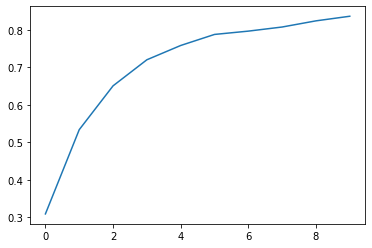

In [115]:
import matplotlib.pyplot as plt
plt.plot(r.history['accuracy'])

In [116]:
def predict_words(seed, no_words):
  for i in range(no_words):
    token_list = tokenizer.texts_to_sequences([seed])[0]
    token_list = pad_sequences([token_list], maxlen=max_seq_length-1, padding='pre')
    predicted = np.argmax(model.predict(token_list), axis=1)

    new_word = ''

    for word, index in tokenizer.word_index.items():
      if predicted == index:
        new_word = word
        break
    seed += " " + new_word
  print(seed)

In [118]:
seed_text = 'heaven'
next_words = 10
predict_words(seed_text, next_words)

1/1 [==============================] - 0s 18ms/step
heaven dost dost dost dost dost dost dost dost dost dost


In [44]:
model.save('new_simile_generator.h5') # Will create a HDF5 file of the model